<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_3_5%2C_3_6_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 3.5, 3.6: K-means and Support Vector Machine**

Concepts covered:


* 3.5. K-Means
* 3.6. Support Vector Machine

# 3.5 K-Means
K-means clustering is a method that partitions $n$ observations into $k$ clusters, where each observation is assigned to the cluster with the nearest mean, known as the cluster centroid. The objective of k-means is to minimize the within-cluster sum of squares (WCSS), given by the formula $$ \text{WCSS}_i = \sum_{x \in S_i} ||x - \mu(S_i)||^2 $$ where $\mu(S_i)$ is the mean of points in cluster $S_i$.


Starting with $k$ random points as centroids, each point is assigned to its nearest centroid, and new centroids are calculated as the mean of each cluster. These steps repeat until there are no changes in cluster assignments. K-means converges to a local optimum because each iteration reduces $ \sum_{i=1}^k \text{WCSS}_i $, making it a monotonic process. However, finding the global optimum is computationally challenging.



# Code description

This Python code implements the K-means clustering algorithm on the Iris dataset, which consists of measurements from three species of iris flowers. The dataset is first standardized to ensure that the features contribute equally to the distance calculations.

The K-means algorithm iteratively assigns each data point to the nearest centroid and updates the centroids based on the mean of the assigned points. Finally, the code visualizes the clustered data points along with the centroids in a 2D scatter plot, representing the first two standardized features of the dataset.

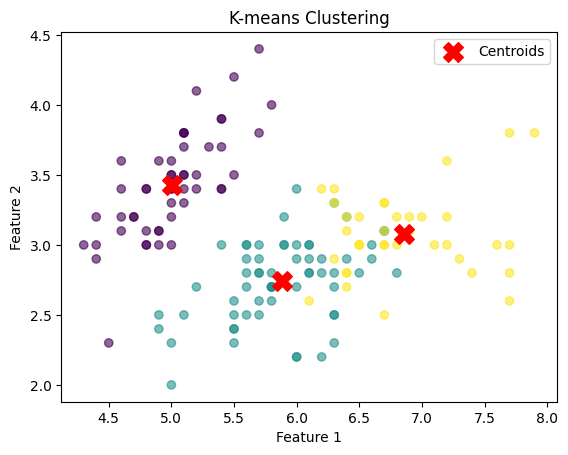

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
data = iris.data  # Features
target = iris.target  # Labels

# Standardize the data (important for K-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-means parameters
n_clusters = 3  # We know there are 3 species in the Iris dataset
max_iter = 100  # Maximum number of iterations
tol = 1e-4  # Tolerance for convergence

# simple distance function between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# This function assigns each point to the nearest centroid
# using the distance function above
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        # find distance to each centroid
        distances = euclidean_distance(point, centroids)
        # find index of nearest centroid
        closest_centroid = np.argmin(distances)
        # lastly add point to nearest centroid
        clusters.append(closest_centroid)
    return np.array(clusters)

# this function updates centroids based on mean of all points within each cluster
def update_centroids(data, clusters, n_clusters):
    # create new array for the updated centroids
    new_centroids = np.zeros((n_clusters, data.shape[1]))
    for i in range(n_clusters):
        # extract all points belonging to the cluster
        cluster_points = data[clusters == i]

        #only update centroid if theres points in the cluster
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
    return new_centroids

# Use this K-means algorithm to iteratively refine cluster assignments and centroid
def k_means(data, n_clusters, max_iter=100, tol=1e-4):
    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    for _ in range(max_iter):
        # begin by assiging points to nearest centroid
        clusters = assign_clusters(data, centroids)
        # now update  the centroids
        new_centroids = update_centroids(data, clusters, n_clusters)

        # Check for convergence, if they've stabilized
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        # now update the centroid for next iteration
        centroids = new_centroids
    return centroids, clusters

# now with our helper fucntions, set two variables equal to k_means output
final_centroids, final_clusters = k_means(data, n_clusters)

# Plotting
plt.scatter(data[:, 0], data[:, 1], c=final_clusters, cmap='viridis', alpha=0.6)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering")
plt.legend()
plt.show()


# 3.6 Support Vector Machine

Support vector machines (SVMs) are supervised learning models designed for classification and regression tasks. The primary objective of SVMs is to identify a hyperplane in a high-dimensional feature space that effectively separates two categories of data points, represented by the labels $y_i$ being either 1 or -1.

To achieve this, SVMs maximize the margin between two parallel hyperplanes, which represent the boundaries of the two classes. This margin is defined by the constraints $y_i(w^T x_i - b) \geq 1$ for all training examples, ensuring that the points of each class fall on the correct side of the margin. The optimization problem involves minimizing the regularization term $\lambda ||w||^2$ and an error term that penalizes misclassifications, while the convexity of the function allows for the application of gradient descent methods to find the optimal parameters.


# Code description

This Python code demonstrates the use of a Support Vector Machine (SVM) for classifying the Iris dataset, which contains measurements of three different iris species. The dataset is split into training and testing sets to evaluate the model's performance effectively. An SVM classifier with a linear kernel is trained on the training data, after which predictions are made on the test set. The accuracy of the classifier is then calculated and printed, providing insight into how well the model can distinguish between the different species based on the provided features.

Accuracy: 0.7333333333333333


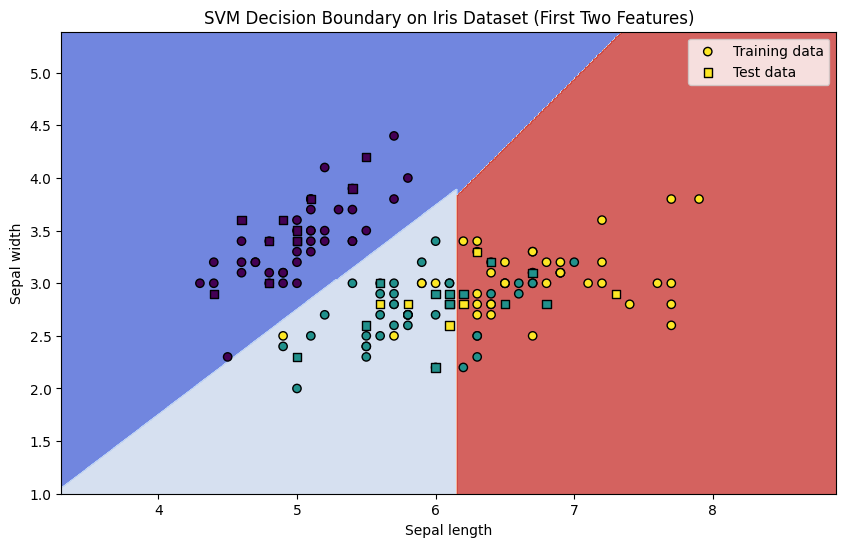

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # only want to use the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# WIll now train the classifier with the split data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a mesh grid for the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Finally, will now plot the decision boundary and the training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test data')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary on Iris Dataset (First Two Features)')
plt.legend()
plt.show()
